In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import cross_validation, svm
from sklearn.preprocessing import MultiLabelBinarizer

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_train = pd.read_csv("C:\\Users\\Sahil Nathani\\Desktop\\Python and ML Material\\Databases\\MachineHack\\Flight_Ticket_Participant_Datasets\\train.csv", encoding='ISO-8859-1')
df_train = df_train.drop(['Route', 'Date_of_Journey', 'Additional_Info'], 1)
df_test = pd.read_csv("C:\\Users\\Sahil Nathani\\Desktop\\Python and ML Material\\Databases\\MachineHack\\Flight_Ticket_Participant_Datasets\\test.csv", encoding='ISO-8859-1')
df_test = df_test.drop(['Route', 'Date_of_Journey', 'Additional_Info'], 1)

In [3]:
print(df_train['Airline'].unique())
print(df_test['Airline'].unique())
print(df_train.columns)
print(np.nan in df_train)

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['Jet Airways' 'IndiGo' 'Multiple carriers' 'Air Asia' 'Air India'
 'Vistara' 'SpiceJet' 'Vistara Premium economy' 'GoAir'
 'Multiple carriers Premium economy' 'Jet Airways Business']
Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Price'],
      dtype='object')
False


In [4]:
#_____________________________Airline___________________________________#
lb = LabelEncoder()
lb.fit(df_train['Airline'])
df_train['Airline'] = lb.fit_transform(df_train['Airline'])
df_test['Airline'] = lb.fit_transform(df_test['Airline'])

In [5]:
#________________________Dates___________________________#
#tr = []
#te = []
#for each in df_train['Date_of_Journey']:
#    each = each.split('-')[1]
#    each = int(each)
#    tr.append(each)
#    
#for each in df_test['Date_of_Journey']:    
#    each = (each.split('-')[1])
#    each = int(each)
#    te.append(each)
##'''Somehow already converted'''
#df_train['Date_of_Journey'] = tr
#df_test['Date_of_Journey'] = te 

In [6]:
#___________________________Sources and Destinations__________________________#
df_train['Destination'] = df_train['Destination'].replace('Delhi', 'New Delhi')
df_test['Destination'] = df_test['Destination'].replace('Delhi', 'New Delhi')

lb.fit(df_train['Destination'])
df_train['Destination'] = lb.fit_transform(df_train['Destination'])
df_test['Destination'] = lb.fit_transform(df_test['Destination'])

lb.fit(df_train['Source'])
df_train['Source'] = lb.fit_transform(df_train['Source'])
df_test['Source'] = lb.fit_transform(df_test['Source'])

In [7]:
#___________________________Timings_______________________________#
def timer(x):
    try:
       h, mi = x.split()
       h, mi = int(h.split('h')[0]), int(mi.split('m')[0])
       mi = mi/60.0
       h+=mi
    except:
        h = x.split('h')[0]
    return float(h)

df_train['Duration'] = [timer(each) for each in df_train['Duration']]
df_test['Duration'] = [timer(each) for each in df_test['Duration']]

In [8]:
#____________________________DEP_TIME_____________________________#
x = []
y = []
for each in df_train['Dep_Time']:
    each = each.split(':')[0]
    x.append(int(each))
    
for each in df_test['Dep_Time']:
    each = each.split(':')[0]
    y.append(int(each))  
    
df_train['Dep_Time'] = x
df_test['Dep_Time'] = y 

In [9]:
#trainx = [] 
#testx = [] 
#for train in (df_train['Dep_Time']):
#    if (0<=train<=4):
#        trainx.append(0)
#    elif (4<train<=11):
#        trainx.append(1)
#    elif (11<train<=17):
#        trainx.append(2)
#    else:
#        trainx.append(3)
#        
#for test in (df_test['Dep_Time']):
#    if (0<=test<=4):
#        testx.append(0)
#    elif (4<test<=11):
#        testx.append(1)
#    elif (11<test<=17):
#        testx.append(2)
#    else:
#        testx.append(3)        
# 
#df_train['Dep_Time'] = trainx 
#df_test['Dep_Time'] = testx 
#
#trainx = [] 
#testx = [] 
#for train in (df_train['Arrival_Time']):
#    if (0<=train<=4):
#        trainx.append(0)
#    elif (4<train<=11):
#        trainx.append(1)
#    elif (11<train<=17):
#        trainx.append(2)
#    else:
#        trainx.append(3)
#        
#for test in (df_test['Arrival_Time']):
#    if (0<=test<=4):
#        testx.append(0)
#    elif (4<test<=11):
#        testx.append(1)
#    elif (11<test<=17):
#        testx.append(2)
#    else:
#        testx.append(3)        
# 
#df_train['Arrival_Time'] = trainx 
#df_test['Arrival_Time'] = testx 

In [10]:
#___________________________ARR_TIME__________________________#
w = []
t = []
for each in df_train['Arrival_Time']:
    try:
        each = each.split(':')[0]
        w.append(int(each))
    except:
        each = each.split()[1]
        each = each.split(':')[0]
        w.append(int(each))
    
for each in df_test['Arrival_Time']:
    try:
        each = each.split(':')[0]
        t.append(int(each))
    except:
        each = each.split()[1]
        each = each.split(':')[0]
        t.append(int(each))
    
df_train['Arrival_Time'] = w
df_test['Arrival_Time'] = t

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


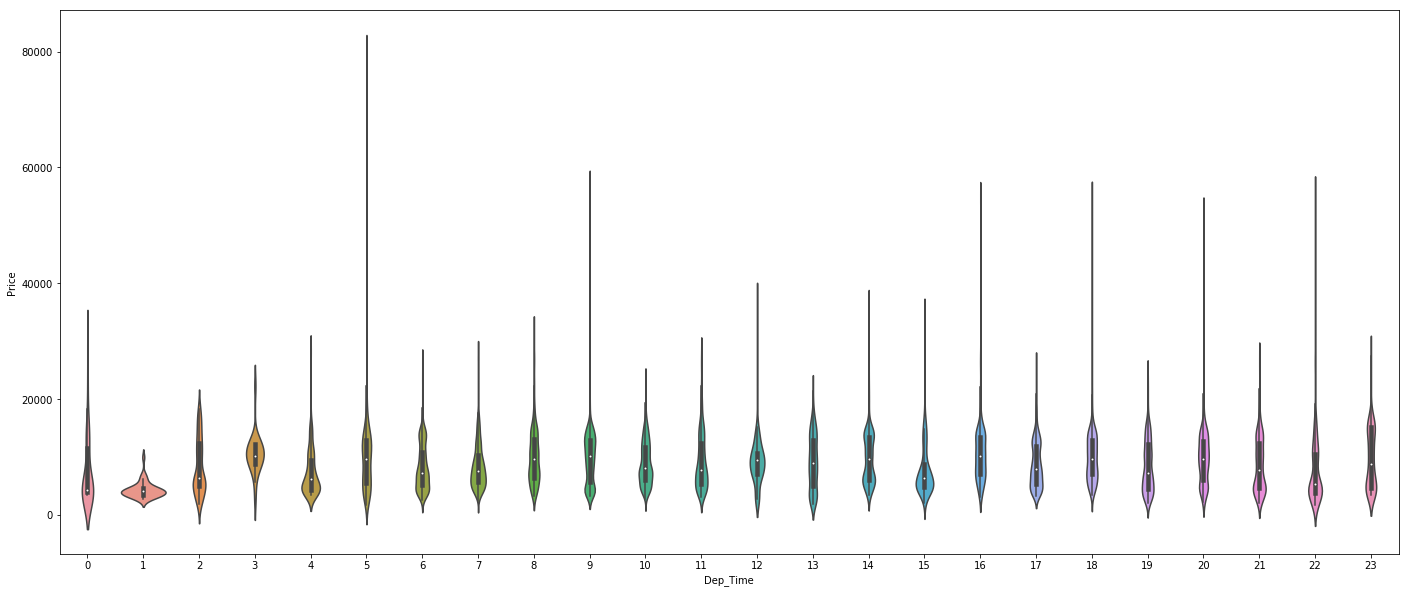

In [11]:
plt.figure(figsize=(24, 10))
sns.violinplot(x=df_train.Dep_Time, y=df_train.Price)

In [12]:
#_________________________Stops__________________________#  
stop1 = []
stop2 = []
for each in df_train['Total_Stops']:
    try:
        each = each.split()[0]
        each = int(each)
        stop1.append(each)
    except:
        each = 0
        stop1.append(each)
df_train['Total_Stops'] = stop1       

for each in df_test['Total_Stops']:
    try:
        each = each.split()[0]
        each = int(each)
        stop2.append(each)
    except:
        each = 0
        stop2.append(each)
df_test['Total_Stops'] = stop2

In [16]:
#_____________________________Additional_info_____________________________#
#lb.fit(df_train['Additional_Info'])
#df_train['Additional_Info'] = lb.fit_transform(df_train['Additional_Info'])
#df_test['Additional_Info'] = lb.fit_transform(df_test['Additional_Info'])

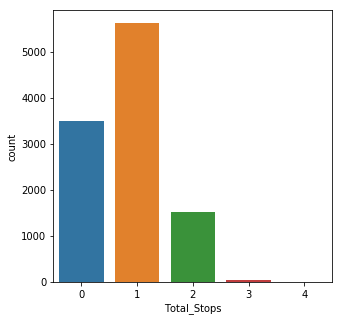

In [18]:
df_train.columns
plt.figure(figsize=(5, 5))
#sns.scatterplot(x='Total_Stops', y='Price', data=df_train)
sns.countplot(x=df_train.Total_Stops)

In [ ]:
#lay_train = []
#for x, y in zip(df_train['Duration'], df_train['Total_Stops']):
#    z = x/(y+1)
#    lay_train.append(z)
#    
#df_train['layoff'] = lay_train    
#
##from sklearn.model_selection import KFold
##____________________________Layover
#lay_test = []
#for x, y in zip(df_test['Duration'], df_test['Total_Stops']):
#    z = x/(y+1)
#    lay_test.append(z)
#    
#df_test['layoff'] = lay_test

#from sklearn.feature_selection import SelectKBest, chi2

#t = SelectKBest(score_func=chi2, k=4)
#f = t.fit(x, y)
#print(f.scores_)

In [18]:
y = np.array(df_train['Price'])
x = np.array(df_train.drop(['Price'], axis=1))
x_out = np.array(df_test)

In [19]:
#kf = KFold(n_splits=3)
#for train_index, test_index in kf.split(x):
#    print("TRAIN:", train_index, "TEST:", test_index)
#    x_train, x_test = x[train_index], x[test_index]
#    y_train, y_test = y[train_index], y[test_index]

In [20]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.2)

In [21]:
'''
#SVM___________________________36%%
for i in range(10):
    clf = svm.SVR(kernel='linear', C=90, gamma=0.7)
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print(acc*100)
'''
#RandomForest_____________________________65%%   
from sklearn.ensemble import RandomForestRegressor
for i in range(10):
    rfr = RandomForestRegressor(n_estimators=100)
    rfr.fit(x_train, y_train)
    accr = rfr.score(x_test, y_test) 
    print(accr*100)   
'''    
#LinearRegression_________________________43%%
from sklearn.linear_model import LinearRegression
for i in range(10):
    linear = LinearRegression()
    linear.fit(x_train, y_train)
    accl = linear.score(x_test, y_test)
    print(accl*100)

#DecisionTree_____________________________57%%
from sklearn.tree import DecisionTreeRegressor
for i in range(10):
    dec = DecisionTreeRegressor()
    dec.fit(x_train, y_train)
    accd = dec.score(x_test, y_test)
    print(accd*100)
 
#PolyRegression 2-53%%, 3-59%%, 4-45%% 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

for count, degree in enumerate([3, 4, 2]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(x_train, y_train)
    accr = model.score(x_test, y_test)
    print(accr*100, degree) 
    
#ADABoost__________________________53%
from sklearn.ensemble import AdaBoostRegressor
for i in range(10):
    ada = AdaBoostRegressor(n_estimators=51)
    ada.fit(x_train, y_train)
    accr = ada.score(x_test, y_test) 
    print(accr*100)

#GradientBoosting_________________67%
from sklearn.ensemble import GradientBoostingRegressor 
for i in range(10):
    gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gbr.fit(x_train, y_train)
    accr = gbr.score(x_test, y_test) 
    print(accr*100)
    
#BaggingRegressor__________________66%
from sklearn.ensemble import BaggingRegressor
for i in range(10):
    bag = BaggingRegressor(n_estimators=21, random_state=42)
    bag.fit(x_train, y_train)
    accr = bag.score(x_test, y_test)
    print(accr*100)
    
#BaussianNB_________________________22%
from sklearn.naive_bayes import GaussianNB
for i in range(10):
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    accr = gnb.score(x_test, y_test)
    print(accr*100)
    
#BernoulliNB_________________________10%
from sklearn.naive_bayes import BernoulliNB
for i in range(10):
    bnb = BernoulliNB()
    bnb.fit(x_train, y_train)
    accr = bnb.score(x_test, y_test)
    print(accr*100)

#MultinomialNB_________________________14%
from sklearn.naive_bayes import MultinomialNB
for i in range(10):
    bnb = MultinomialNB()
    bnb.fit(x_train, y_train)
    accr = bnb.score(x_test, y_test)
    print(accr*100)    
'''
'''
#___________________XGBOOST
import xgboost as xgb
for i in range(10):
    xg = xgb.sklearn.XGBRegressor()
    xg.fit(x_train, y_train)
    accr = xg.score(x_test, y_test)
    print(accr*100)
'''

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


62.919479835152046
62.93142513273424
63.25649996854248
63.08404448687532
63.219505747797314
62.93792112117009
63.185118880746494
62.908234595638035
62.704168341021514
62.94165110025053


'\n#___________________XGBOOST\nimport xgboost as xgb\nfor i in range(10):\n    xg = xgb.sklearn.XGBRegressor()\n    xg.fit(x_train, y_train)\n    accr = xg.score(x_test, y_test)\n    print(accr*100)\n'

In [22]:
from sklearn.ensemble import GradientBoostingRegressor 
for i in range(10):
    gbr = GradientBoostingRegressor(n_estimators=151, random_state=42)
    gbr.fit(x_train, y_train)
    accr = gbr.score(x_test, y_test) 
    print(accr*100)

result = (gbr.predict(x_out))

60.786881953952054
60.786881953952054
60.786881953952054
60.786881953952054
60.786881953952054
60.786881953952054
60.786881953952054
60.786881953952054
60.786881953952054
60.786881953952054


In [23]:
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, BatchNormalization
#
#model = Sequential()
#model.add(Dense(128, kernel_initializer='normal', activation='relu', input_dim=x_train.shape[1]))
##model.add(Dropout(0.4))
##model.add(BatchNormalization())
#model.add(Dense(128, kernel_initializer='normal', activation='relu'))
#model.add(Dropout(0.4))
#model.add(Dense(128, kernel_initializer='normal', activation='relu'))
##model.add(Dropout(0.5))
#model.add(Dense(1, kernel_initializer='normal', activation='linear'))
# 
#model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])
#
#model.fit(x_train, y_train, epochs=10, batch_size=100)

In [24]:
result = [int(each) for each in result]

out_data = pd.DataFrame(result)
out_data.columns=['Price']
out_data.to_excel('MachineHackFlightFees.xlsx', header=True)